In [36]:
import numpy as np
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt

In [37]:
def f(x):
    return np.power(x, 2) + 4 * np.sin(x) - 2

In [38]:
a = 10

In [39]:
x = np.arange(-a, a, 0.001, np.float)

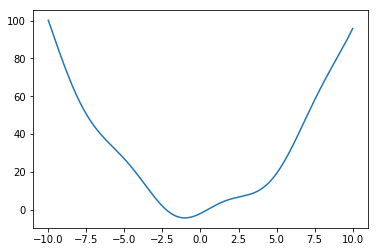

In [40]:
plt.plot(x, f(x))

### Полином Лагранжа по равноотстающим узлам 

In [41]:
def get_linspace(a, n):
    return np.linspace(-a, a, n, np.float)

In [42]:
def omega(x, xn):
    prod = 1
    for xi in xn: 
        prod *= (x - xi)
    return prod

In [43]:
def omega_(k, xn):
    prod = 1
    for i, xi in enumerate(xn):
        if i != k:
            prod *= (xn[k] - xi)
            
    return prod
            

In [44]:
def l(x, k, xn):
    return omega(x, xn) / ((x - xn[k]) * omega_(k, xn))

In [45]:
def L_n(x, xn, f=f):
    sum = 0
    for i, xi in enumerate(xn):
        sum += l(x, i, xn) * f(xi)
    return sum

In [59]:
def plot_int(L, a, n, f=f, get_linspace=get_linspace, label1="original_f", label2="int_f"):
    xn = get_linspace(a, n)
    
    plt.plot(x, f(x), label=label1)
    plt.plot(x, L(x, xn, f), label=label2)
    plt.title("Сравнение при {}-х узлах".format(n))
    plt.show()

Графики для 3-х узлов 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


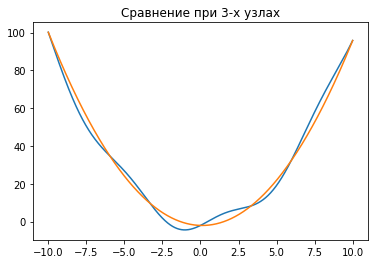

In [60]:
plot_int(L_n, a, 3)

График для 6 углов

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


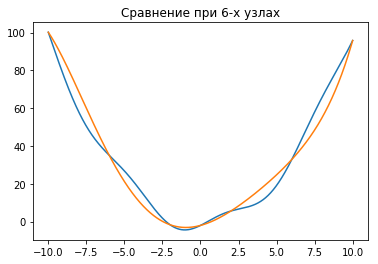

In [62]:
plot_int(L_n, a, 6)

График при 9 узлах

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


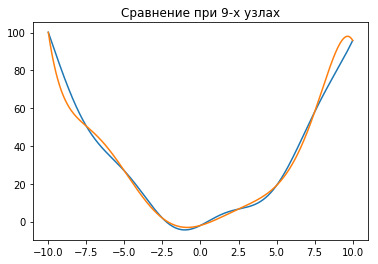

In [61]:
plot_int(L_n, a, 9)

График при 12 узлах

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


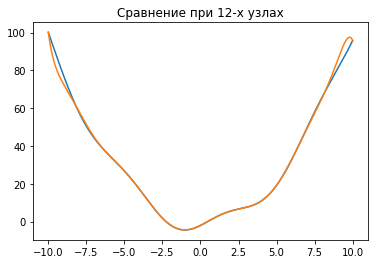

In [63]:
plot_int(L_n, a, 12)

### Полином Лагранжа с узлами в корнях полинома Чебышева

In [67]:
def get_roots(a, n):
    xn = []
    for i in range(n+1):
        xn.append(a * np.cos((2 * i + 1) * np.pi / (2 * n + 2)))
    return xn

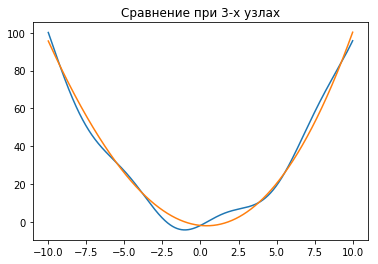

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


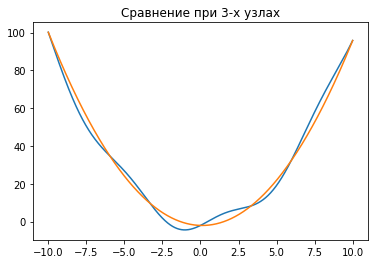

In [68]:
n=3
plot_int(L_n, a, n, get_linspace=get_roots)
plot_int(L_n, a, n)

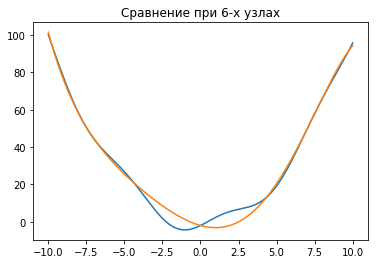

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


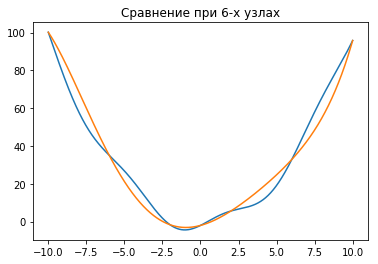

In [69]:
n=6
plot_int(L_n, a, n, get_linspace=get_roots)
plot_int(L_n, a, n)

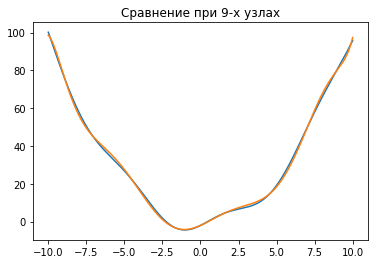

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


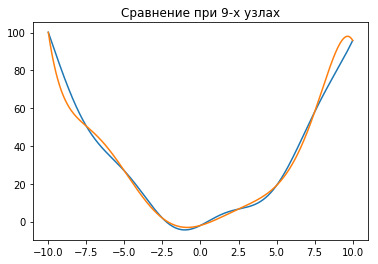

In [70]:
n=9
plot_int(L_n, a, n, get_linspace=get_roots)
plot_int(L_n, a, n)

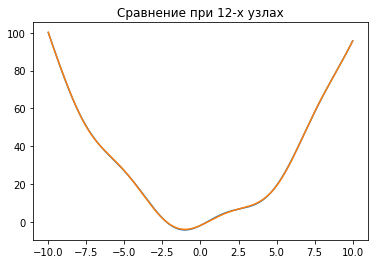

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


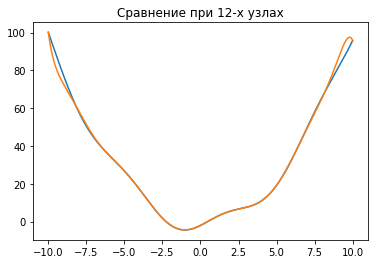

In [71]:
n=12
plot_int(L_n, a, n, get_linspace=get_roots)
plot_int(L_n, a, n)